<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
import numpy as np
import tensorflow as tf
import zipfile
from tqdm import tqdm
# Working with images
import cv2
import re
from matplotlib import pyplot as plt

# Display Images
from PIL import Image, ImageFilter

# IPython display
from IPython.display import display

RANDOM_SEED = 42

In [0]:
IMG_WIDTH = 50
IMG_HEIGHT = 50
IMG_CHANNELS = 1

In [0]:
# To make output stable across runs
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls -l "drive/My Drive/MSPA/Predict 422/Week 7/all.zip"

-rw------- 1 root root 851576569 Dec  4 02:01 'drive/My Drive/MSPA/Predict 422/Week 7/all.zip'


In [8]:
!unzip "drive/My Drive/MSPA/Predict 422/Week 7/all.zip"

Archive:  drive/My Drive/MSPA/Predict 422/Week 7/all.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [0]:
!unzip train.zip

In [0]:
!ls -lrt /content/train

In [0]:
def label_img(img_name):
  if 'cat.' in img_name: return 0
  elif 'dog.' in img_name: return 1 
  
def img_index(img_name):
  if 'cat.' in img_name: knt=0
  elif 'dog.' in img_name: knt=1
  num=int(re.sub("\D", "", img_name))
  return ((12500*knt) + num)

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="bicubic")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="bicubic")
    plt.axis("off")

In [12]:
print (label_img('cats_dogs_images/dog.1.jpg'))

1


In [0]:
from os import listdir
import cv2 as cv2

training_data = []

for z in listdir("/content/train"):
    label = label_img(z)
    img_indx = img_index(z)
    img_str=cv2.imread(os.path.join("/content/train", z),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img_str, (IMG_WIDTH, IMG_HEIGHT))

    training_data.append([ np.array(img_indx), np.array(img), np.array(label)])

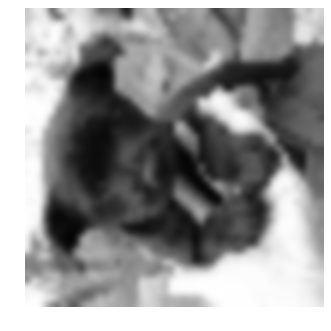

In [14]:
plot_image(training_data[0][1])

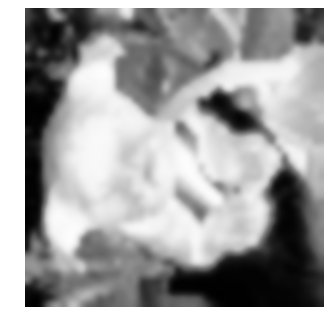

In [15]:
plot_color_image(training_data[0][1])

In [0]:
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import Activation, Dense

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

'''model = tf.keras.Sequential([keras.layers.Flatten(input_shape=(50, 50)),
                            keras.layers.Dense(150, activation=tf.nn.relu),
                            keras.layers.Conv2D(32, 3*3, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                            keras.layers.Dense(10, activation=tf.nn.softmax)
                            ])'''

model = Sequential()
model.add(Dense(150, input_shape=(50,50), activation='relu'))
model.add(Conv2D(32, 3*3, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
#model.add(Dense(150, activation=tf.nn.relu))

ValueError: ignored